In [130]:
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

def f_th(R1,R2):
    Rm = np.sqrt(R1*R2)
    f = pi*np.sqrt(Rm)/(1-Rm)
    return f

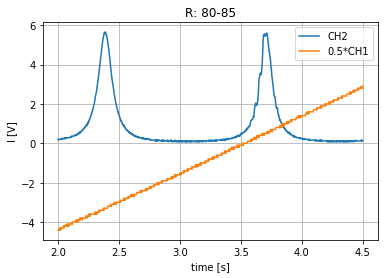

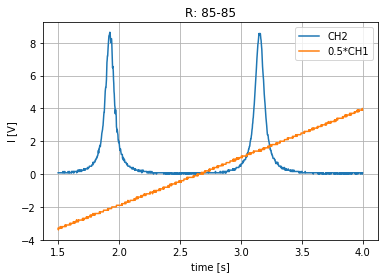

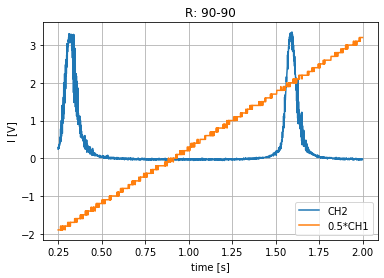

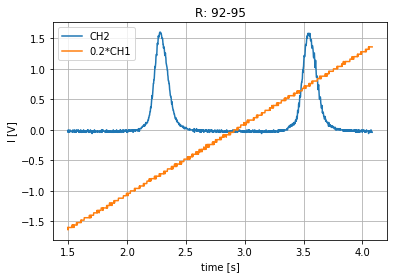

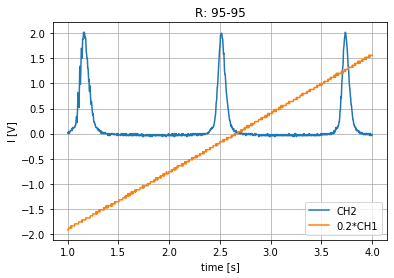

In [131]:
F_theory = [f_th(0.80,0.85),f_th(0.85,0.85),f_th(0.90,0.90),f_th(0.92,0.95),f_th(0.95,0.95)]
name = ['8085.csv','8585.csv','9090.csv','9295.csv','9595.csv']
title = ['R: 80-85','R: 85-85','R: 90-90','R: 92-95','R: 95-95']
norm = [0.5,0.5,0.5,0.2,0.2]

for n in range(len(name)):
    df = pd.read_csv(name[n])
    tc = np.asarray(df.iloc[:,0])
    CH1c  = np.asarray(df.iloc[:,1])
    CH2c  = np.asarray(df.iloc[:,2])
    plt.plot(tc,CH2c,label  = 'CH2')
    plt.plot(tc,norm[n]*CH1c,label = '{}*CH1'.format(norm[n]))
    
    plt.title(title[n])
    plt.xlabel('time [s]')
    plt.ylabel('I [V]')
    plt.legend()
    plt.grid()
    plt.show()

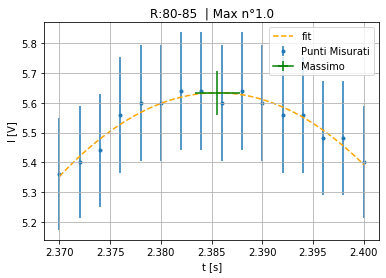

Xmax = 2.3855695371217736 +- 0.002252340961560454 [s]
Ymax = 5.633924146285598 +- 0.07355346211060583 [V]


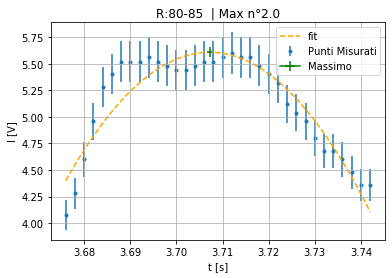

Xmax = 3.7072049548800714 +- 0.0005916726722783197 [s]
Ymax = 5.607733319598282 +- 0.048234065162641684 [V]


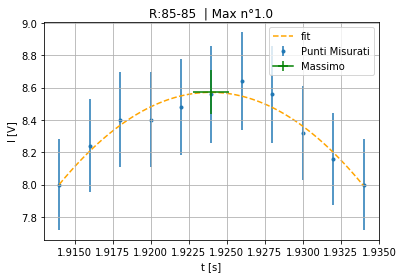

Xmax = 1.9239585809193194 +- 0.0011853359898901517 [s]
Ymax = 8.570811308219598 +- 0.13513893946158864 [V]


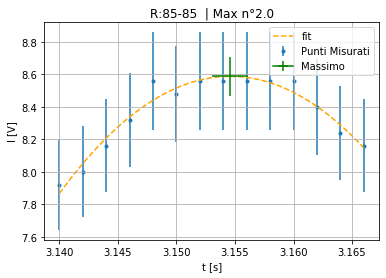

Xmax = 3.154596084372791 +- 0.0015478729664413656 [s]
Ymax = 8.588043103942104 +- 0.11808132134889919 [V]


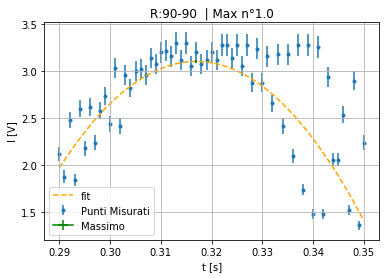

Xmax = 0.3169888332355203 +- 0.00019968382037769653 [s]
Ymax = 3.104830993901568 +- 0.019486201338039136 [V]


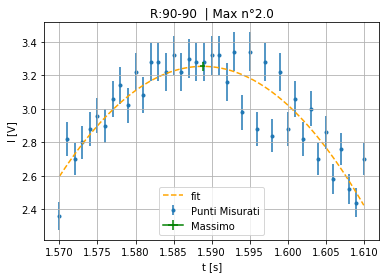

Xmax = 1.5888379884293442 +- 0.00035420444186093526 [s]
Ymax = 3.253411241404356 +- 0.025652762475408097 [V]


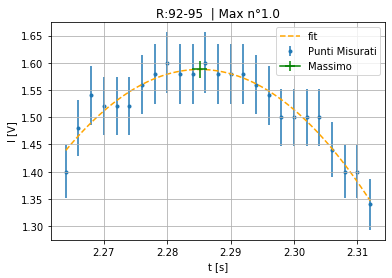

Xmax = 2.285111569603938 +- 0.0011776974549218516 [s]
Ymax = 1.5876958823883927 +- 0.016102689759463218 [V]


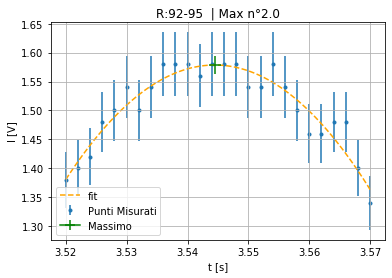

Xmax = 3.544470032218734 +- 0.0009997725057488529 [s]
Ymax = 1.5785454607592648 +- 0.01590686766626324 [V]


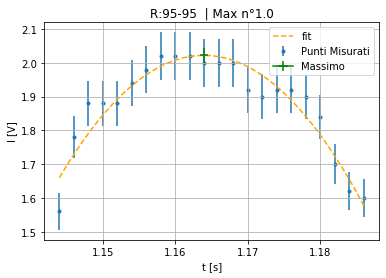

Xmax = 1.1639214959895832 +- 0.0005746708939789299 [s]
Ymax = 2.0222042658856902 +- 0.02174419429101817 [V]


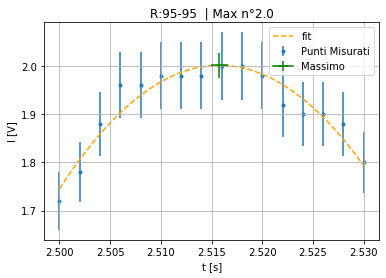

Xmax = 2.515775710903524 +- 0.0008680812285283535 [s]
Ymax = 2.0013032671698734 +- 0.025727079294359367 [V]


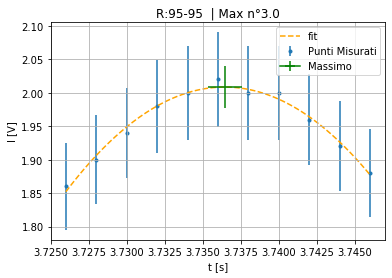

Xmax = 3.736437878137672 +- 0.0011188002884922044 [s]
Ymax = 2.008705731915969 +- 0.0316189000355104 [V]


In [132]:
Xmax_list = np.asarray([]) # Xmax,Ymax
Ymax_list = np.asarray([])

def fit_func(x,a,b,c):
    return -a*(x-b)**2 + c
AAA  = pd.read_csv('datafit.csv')
t = np.asarray(AAA.iloc[:,0])
CH1  = np.asarray(AAA.iloc[:,1])
CH2  = np.asarray(AAA.iloc[:,2])

i = 0
while i < len(t):
    X = np.asarray([])   
    Y = np.asarray([])                        
    while t[i] != CH2[i]:
        X = np.append(X,t[i])  
        Y = np.append(Y,CH2[i]) 
        i = i + 1;
    #print(Y)

    sY = 0.035*Y
    [a,b,c],pcov = s.optimize.curve_fit(fit_func,X,Y,sigma = sY,absolute_sigma = True,method = 'trf',bounds = ([0,0,0],[10000,5,10]))
    #[a,b,c],pcov = s.optimize.curve_fit(fit_func,X,Y,sigma = sY,absolute_sigma = True)
    
    [sa,sb,sc] = np.sqrt(np.diag(pcov))

    xMax = b
    sxMax = sb
    yMax = c
    syMax = sc
    
    if t[i] == 1000:
        Xmax_list = np.append(Xmax_list,666)
        Ymax_list = np.append(Ymax_list,666)
    
    Xmax_list = np.append(Xmax_list,xMax)
    Ymax_list = np.append(Ymax_list,yMax)
    
    #Plot
    plt.errorbar(X,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
    x = np.linspace(np.min(X),np.max(X),100)
    y = fit_func(x,a,b,c)
    plt.plot(x,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)
    plt.errorbar(xMax,yMax,yerr=syMax, xerr=sxMax, label = 'Massimo',color = 'g',zorder = 2)
    plt.title('R:{}  | Max n°{}'.format(CH1[i],t[i]/1000))
    plt.ylabel('I [V]')
    plt.xlabel('t [s]')
    plt.grid()
    plt.legend()
    plt.show()
    print('Xmax =',xMax,'+-',sxMax,'[s]')
    print('Ymax =',yMax,'+-',syMax,'[V]')
    #print(a,b,c)
    i = i + 1;

In [133]:
print(Ymax_list)
print(Xmax_list)

[666.           5.63392415   5.60773332 666.           8.57081131
   8.5880431  666.           3.10483099   3.25341124 666.
   1.58769588   1.57854546 666.           2.02220427   2.00130327
   2.00870573]
[6.66000000e+02 2.38556954e+00 3.70720495e+00 6.66000000e+02
 1.92395858e+00 3.15459608e+00 6.66000000e+02 3.16988833e-01
 1.58883799e+00 6.66000000e+02 2.28511157e+00 3.54447003e+00
 6.66000000e+02 1.16392150e+00 2.51577571e+00 3.73643788e+00]


In [134]:
mean_max = np.asarray([]) # Xmax,Ymax
dist_max   = np.asarray([])
n = 1
while n < len(Ymax_list) - 1:
    first_max = Xmax_list[n]
    Y = 0
    h = 0
    while n < len(Ymax_list) and Ymax_list[n] < 600 :
        Y = Y + Ymax_list[n]
        h = h + 1
        n = n + 1
    dm = (Xmax_list[n-1] - first_max)/(h-1)
    dist_max  = np.append(dist_max,dm) 
    mean_max = np.append(mean_max,Y/h)   
    n = n + 1

In [135]:
mean_min = np.asarray([0.01,0.01,0.01,0.01,0.01])


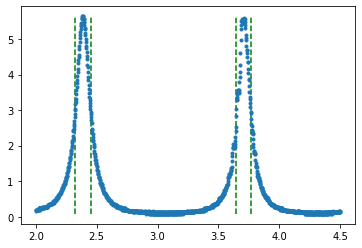

[2.31813536 2.45386464 3.64578384 3.76743232]


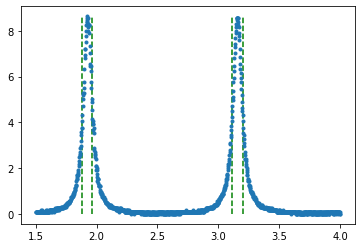

[1.88370595 1.96537643 3.11037261 3.19829405]


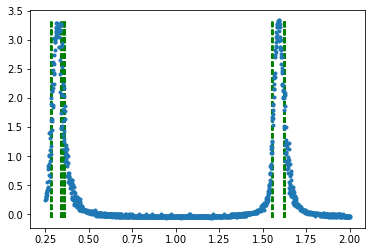

[0.27988187 0.2800611  0.28156725 0.28250663 0.28356189 0.28784031
 0.28818873 0.33994191 0.34005874 0.34194126 0.34207162 0.34693671
 0.34704678 0.34885418 0.34925518 0.35365544 0.35436655 0.35556174
 0.35650496 0.35761546 0.3597228  0.36008942 0.36174284 0.36222209
 0.36371308 0.36428692 1.55193672 1.55209844 1.55478309 1.55568171
 1.55637134 1.6208924  1.62112415 1.62281328 1.62320108 1.6245193
 1.625437   1.62648572 1.62752456 1.62841705 1.62970698 1.6303443 ]


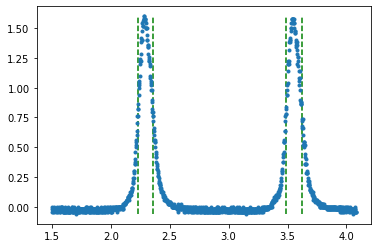

[2.22888534 2.35667198 3.48632802 3.61922399]


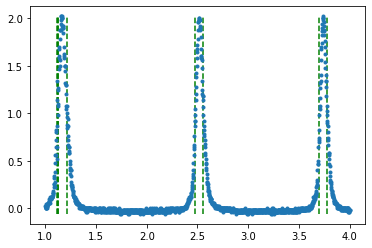

[1.11700263 1.12559262 1.12633948 1.21199078 2.47867896 2.55749078
 3.70067896 3.77498156]


In [136]:
for n in range(len(name)):
    mezza_h = (mean_max[n] - mean_min[n])/2
    df = pd.read_csv(name[n])
    t = np.asarray(df.iloc[:,0])
    CH2  = np.asarray(df.iloc[:,2])
    X,sX = my.intersect(mezza_h,t,CH2,sdx = 0,sdy = 0,plot = True)
    print(X)
    #plt.grid()

In [137]:
def mezzo(x1,x2,x3,x4):
    first  = x2-x1
    second = x4-x3
    return (first + second)/2

def mezzo3(x1,x2,x3,x4,x5,x6):
    first  = x2-x1
    second = x4-x3
    third  = x6-x5
    return (first + second + third)/3

dist_h2 = np.asarray([ mezzo(2.31813536,2.45386464,3.64578384,3.76743232),
                      mezzo(1.88370595,1.96537643,3.11037261,3.19829405),
                      mezzo(0.28250663,0.35436655,1.55478309,1.625437),
                      mezzo(2.22888534,2.35667198,3.48632802,3.61922399),
                      mezzo3(1.12559262,1.21199078,2.47867896,2.55749078,3.70067896,3.77498156)])

f_exp = dist_max/dist_h2

In [138]:
Array = pd.DataFrame({'Data':name,'Ymax':mean_max,'Ymin':mean_min,'Dist Max':dist_max,'Dist H/2':dist_h2,'F exp':f_exp,'F theory':F_theory})
Array

,Data,Ymax,Ymin,Dist Max,Dist H/2,F exp,F theory
0,8085.csv,5.620829,0.01,1.321635,0.128689,10.270005,16.266714
1,8585.csv,8.579427,0.01,1.230638,0.084796,14.512926,19.309369
2,9090.csv,3.179121,0.01,1.271849,0.071257,17.848782,29.803765
3,9295.csv,1.583121,0.01,1.259358,0.130341,9.662006,46.645650
4,9595.csv,2.010738,0.01,1.286258,0.079838,16.110947,61.240915
